In [43]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv('diabetes.csv')

In [45]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [47]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [48]:
replace_column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [49]:
for i in replace_column:
    df[i]=df[i].replace(0,df[i].mean())

In [50]:
df['Insulin']=df['Insulin'].replace(to_replace=df['Insulin'].median())

In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,157.029165,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,114.193214,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,78.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,130.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,193.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

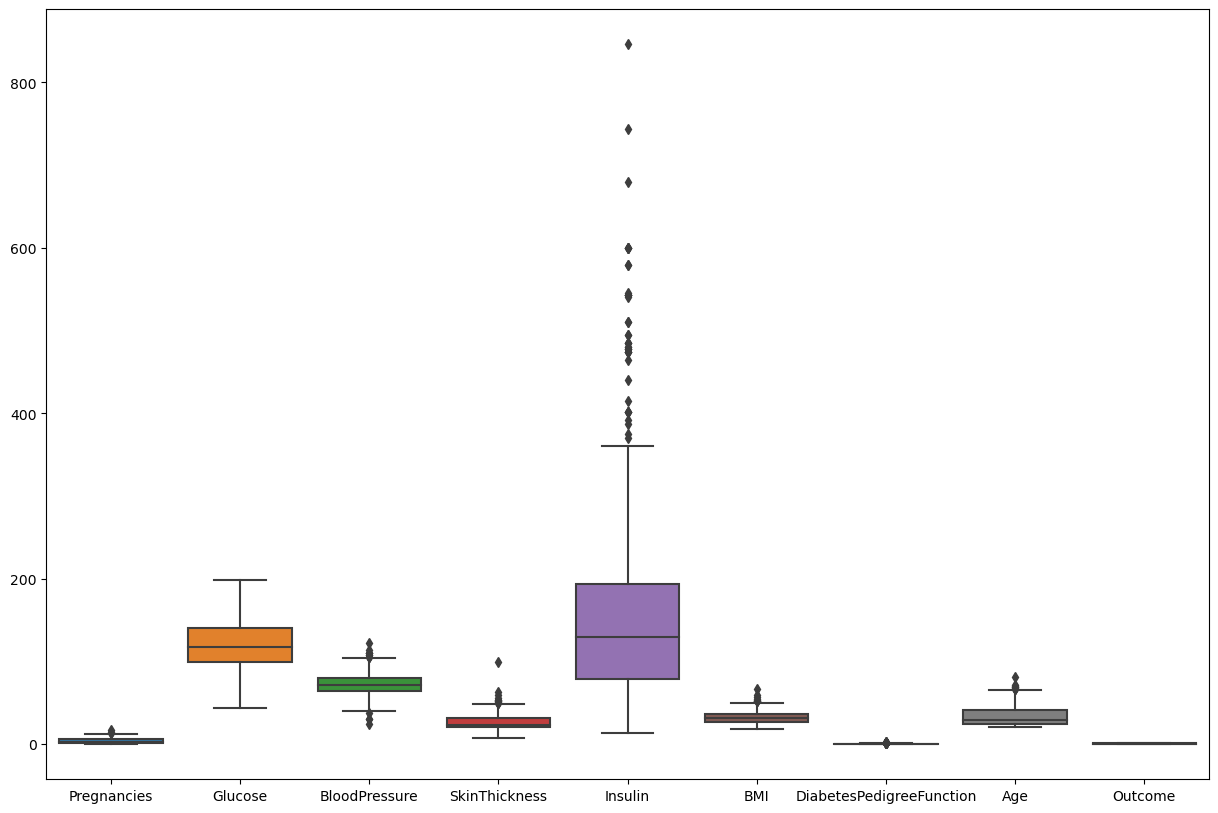

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [53]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,180.000000,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,112.000000,30.1,0.349,47,1


In [54]:
X=df.drop(columns=['Outcome'])
y=df['Outcome']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [56]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
766,1,126.0,60.0,20.536458,112.0,30.1,0.349,47
748,3,187.0,70.0,22.000000,200.0,36.4,0.408,36
42,7,106.0,92.0,18.000000,70.0,22.7,0.235,48
485,0,135.0,68.0,42.000000,250.0,42.3,0.365,24
543,4,84.0,90.0,23.000000,56.0,39.5,0.159,25
...,...,...,...,...,...,...,...,...
188,8,109.0,76.0,39.000000,114.0,27.9,0.640,31
8,2,197.0,70.0,45.000000,543.0,30.5,0.158,53
645,2,157.0,74.0,35.000000,440.0,39.4,0.134,30
381,0,105.0,68.0,22.000000,82.0,20.0,0.236,22


In [57]:
y_test

766    1
748    1
42     0
485    1
543    0
      ..
188    1
8      1
645    0
381    0
314    1
Name: Outcome, Length: 231, dtype: int64

In [58]:
scaler=StandardScaler()

In [59]:
X_train=scaler.fit_transform(X_train)

In [60]:
X_test=scaler.transform(X_test)

## For LogisticRegression

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameter={
    'penalty':('l1','l2','elasticnet',None),
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
}

In [63]:
gmodel=GridSearchCV(estimator=LogisticRegression(),param_grid=parameter,cv=10,scoring='accuracy')

In [64]:
gmodel.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
560 fits failed out of a total of 840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueE

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ('l1', 'l2', 'elasticnet', None),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [65]:
gmodel.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [66]:
y_pred=gmodel.predict(X_test)

In [67]:
confusion_matrix(y_pred,y_test)

array([[132,  35],
       [ 18,  46]], dtype=int64)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       167
           1       0.57      0.72      0.63        64

    accuracy                           0.77       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.79      0.77      0.78       231



In [70]:
accuracy_score(y_pred,y_test)

0.7705627705627706

In [71]:
{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [72]:
gmodel1=LogisticRegression(solver='liblinear')

In [73]:
gmodel1.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [74]:
y_pred1=gmodel1.predict(X_test)

In [75]:
confusion_matrix(y_pred1,y_test)

array([[132,  33],
       [ 18,  48]], dtype=int64)

In [76]:
accuracy_score(y_pred1,y_test)

0.7792207792207793

In [77]:
import joblib

In [78]:
scaler=joblib.dump(scaler,'scaler.pkl')

In [79]:
model=joblib.dump(gmodel1,'gmodel1.pkl')

In [80]:
X_test

array([[-0.83425971,  0.14429084, -1.04064174, ..., -0.36002334,
        -0.40594595,  1.14277451],
       [-0.23412915,  2.17771479, -0.20273834, ...,  0.547541  ,
        -0.2184046 ,  0.22435696],
       [ 0.96613198, -0.52240553,  1.64064914, ..., -1.42605129,
        -0.76831397,  1.22626702],
       ...,
       [-0.53419443,  1.17767022,  0.13242302, ...,  0.9797145 ,
        -1.08935933, -0.27659808],
       [-1.13432499, -0.55574035, -0.37031902, ..., -1.81500744,
        -0.76513531, -0.94453812],
       [ 0.96613198, -0.42240108,  0.63516506, ...,  0.47551209,
         2.06705688,  0.80880449]])

## For SVC

In [81]:
parameter_SVC={'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','poly']
              }

In [82]:
gmodel_SVC = GridSearchCV(estimator=SVC(),param_grid=parameter_SVC,cv=10,scoring='accuracy',verbose= 3)

In [83]:
def model_to_score(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_pred,y_test))
    print(classification_report(y_pred,y_test))

In [84]:
model_to_score(gmodel_SVC)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
[CV 1/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 2/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.0s
[CV 3/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.704 total time=   0.0s
[CV 4/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.815 total time=   0.0s
[CV 6/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.889 total time=   0.0s
[CV 7/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.796 total time=   0.0s
[CV 8/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.736 total time=   0.0s
[CV 9/10] END ....C=0.1, gamma=1, kernel=linear;, score=0.755 total time=   0.0s
[CV 10/10] END ...C=0.1, gamma=1, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rb

[CV 4/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 5/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 6/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 7/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 8/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.660 total time=   0.0s
[CV 9/10] END ...C=0.1, gamma=0.001, kernel=rbf;, score=0.660 total time=   0.0s
[CV 10/10] END ..C=0.1, gamma=0.001, kernel=rbf;, score=0.660 total time=   0.0s
[CV 1/10] END ..C=0.1, gamma=0.001, kernel=poly;, score=0.648 total time=   0.0s
[CV 2/10] END ..C=0.1, gamma=0.001, kernel=poly;, score=0.648 total time=   0.0s
[CV 3/10] END ..C=0.1, gamma=0.001, kernel=poly;, score=0.648 total time=   0.0s
[CV 4/10] END ..C=0.1, gamma=0.001, kernel=poly;, score=0.648 total time=   0.0s
[CV 5/10] END ..C=0.1, gamma=0.001, kernel=poly;, score=0.648 total time=   0.0s
[CV 6/10] END ..C=0.1, gamma

[CV 9/10] END ......C=1, gamma=0.1, kernel=poly;, score=0.698 total time=   0.0s
[CV 10/10] END .....C=1, gamma=0.1, kernel=poly;, score=0.679 total time=   0.0s
[CV 1/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.722 total time=   0.0s
[CV 2/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.759 total time=   0.0s
[CV 3/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.704 total time=   0.0s
[CV 4/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 6/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.870 total time=   0.0s
[CV 7/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.796 total time=   0.0s
[CV 8/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.736 total time=   0.0s
[CV 9/10] END ...C=1, gamma=0.01, kernel=linear;, score=0.736 total time=   0.0s
[CV 10/10] END ..C=1, gamma=0.01, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/10] END ......C=1, gam

[CV 5/10] END ........C=10, gamma=1, kernel=rbf;, score=0.593 total time=   0.0s
[CV 6/10] END ........C=10, gamma=1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 7/10] END ........C=10, gamma=1, kernel=rbf;, score=0.685 total time=   0.0s
[CV 8/10] END ........C=10, gamma=1, kernel=rbf;, score=0.660 total time=   0.0s
[CV 9/10] END ........C=10, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 10/10] END .......C=10, gamma=1, kernel=rbf;, score=0.717 total time=   0.0s
[CV 1/10] END .......C=10, gamma=1, kernel=poly;, score=0.630 total time=   7.4s
[CV 2/10] END .......C=10, gamma=1, kernel=poly;, score=0.667 total time=  42.1s
[CV 3/10] END .......C=10, gamma=1, kernel=poly;, score=0.648 total time=  29.6s
[CV 4/10] END .......C=10, gamma=1, kernel=poly;, score=0.667 total time=  31.7s
[CV 5/10] END .......C=10, gamma=1, kernel=poly;, score=0.759 total time=  36.9s
[CV 6/10] END .......C=10, gamma=1, kernel=poly;, score=0.796 total time=  30.3s
[CV 7/10] END .......C=10, g

[CV 1/10] END C=10, gamma=0.0001, kernel=linear;, score=0.722 total time=   0.0s
[CV 2/10] END C=10, gamma=0.0001, kernel=linear;, score=0.759 total time=   0.0s
[CV 3/10] END C=10, gamma=0.0001, kernel=linear;, score=0.722 total time=   0.0s
[CV 4/10] END C=10, gamma=0.0001, kernel=linear;, score=0.722 total time=   0.0s
[CV 5/10] END C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 6/10] END C=10, gamma=0.0001, kernel=linear;, score=0.870 total time=   0.0s
[CV 7/10] END C=10, gamma=0.0001, kernel=linear;, score=0.796 total time=   0.0s
[CV 8/10] END C=10, gamma=0.0001, kernel=linear;, score=0.736 total time=   0.0s
[CV 9/10] END C=10, gamma=0.0001, kernel=linear;, score=0.736 total time=   0.0s
[CV 10/10] END C=10, gamma=0.0001, kernel=linear;, score=0.774 total time=   0.0s
[CV 1/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/10] END ...C=10, gamma=0.0001, kernel=rbf;, score=0.648 total time=   0.0s
[CV 3/10] END ...C=10, gamm

In [85]:
model_svc = joblib.dump(gmodel_SVC,"gmodel_SVC.pkl")

## For DecisionTreeClassifier

In [86]:
parameter_DecisionTreeClassifier={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']  
}

In [87]:
gmodel_DTC = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameter_DecisionTreeClassifier,cv=10,scoring='accuracy',verbose= 3)

In [88]:
model_to_score(gmodel_DTC)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
[CV 1/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.648 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.556 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.648 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.630 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.741 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.648 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.537 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.660 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=1, max_features=auto, spl

[CV 10/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=best;, score=0.717 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.759 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.704 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.759 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=2, max_features=sqrt, splitter=random;, score=0.679 total time=   0.0s
[C

[CV 4/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.648 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.796 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.759 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.679 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.679 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=best;, score=0.717 total time=   0.0s
[CV 1/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=random;, score=0.685 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=4, max_features=sqrt, splitter=random;, score=0.722 total time=   0.0s
[CV 3/10] END 

[CV 2/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.778 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.667 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.630 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.778 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.741 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.796 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.736 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.642 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=5, max_features=log2, splitter=random;, score=0.736 total time=   0.0s


[CV 6/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.648 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.722 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.566 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.660 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=best;, score=0.604 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.630 to

[CV 6/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.796 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.815 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.774 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.660 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=best;, score=0.717 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=random;, score=0.648 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=random;, score=0.667 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=random;, score=0.704 total time=   0.0s
[CV 4/10] END criterion=entropy, max_depth=3, max_features=log2, splitter=random;, score=0.722 to

[CV 5/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.833 total time=   0.0s
[CV 6/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.704 total time=   0.0s
[CV 7/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.778 total time=   0.0s
[CV 8/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.736 total time=   0.0s
[CV 9/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.717 total time=   0.0s
[CV 10/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=best;, score=0.547 total time=   0.0s
[CV 1/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 2/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.648 total time=   0.0s
[CV 3/10] END criterion=entropy, max_depth=5, max_features=sqrt, splitter=random;, score=0.741 tota

[CV 6/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=1, max_features=log2, splitter=random;, score=nan total time=

[CV 3/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=3, max_features=auto, splitter=random;, score=nan total time=   0.0

[CV 1/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 7/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 8/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=4, max_features=sqrt, splitter=best;, score=nan total time=   0.0s
[

[CV 8/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=nan total time=   0.0s
[CV 9/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=nan total time=   0.0s
[CV 10/10] END criterion=log_loss, max_depth=5, max_features=sqrt, splitter=random;, score=nan total time=   0.0s
[CV 1/10] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 2/10] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 3/10] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 4/10] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 5/10] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 6/10] END criterion=log_loss, max_depth=5, max_features=log2, splitter=best;, score=nan total time=  

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

In [47]:
model_DTC = joblib.dump(gmodel_DTC,"gmodel_DTC.pkl")

## For BernoulliNB

In [51]:
parameter_BNB = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'binarize': [0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5], [0.6, 0.4], [0.7, 0.3], [0.8, 0.2], [0.9, 0.1]]
}

In [52]:
gmodel_BNB = GridSearchCV(estimator=BernoulliNB(),param_grid=parameter_BNB,cv=10,scoring='accuracy',verbose= 3)

In [53]:
model_to_score(gmodel_BNB)

Fitting 10 folds for each of 840 candidates, totalling 8400 fits
[CV 1/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.815 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=0.0, class_prior=None, fit_prior=True;, score=0.642 total tim

[CV 2/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.704 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.722 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.630 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.796 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.774 total time

[CV 10/10] END alpha=0.1, binarize=0.1, class_prior=None, fit_prior=False;, score=0.755 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.500 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.556 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.556 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.481 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.500 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.500 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.500 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.528 total time=   0.0s
[CV 9

[CV 2/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.741 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.741 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.685 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.778 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.759 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.679 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.604 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.755 total time

[CV 3/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.759 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.741 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=0.5, class_prior=None, fit_prior=False;, score=0.611 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=0.5, class_prior=No

[CV 5/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.741 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.741 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.698 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False;, score=0.611 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False;, score=0.759 total time=   0.

[CV 7/10] END alpha=0.1, binarize=1.0, class_prior=None, fit_prior=False;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=1.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=1.0, class_prior=None, fit_prior=False;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=1.0, class_prior=None, fit_prior=False;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=

[CV 2/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.704 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.722 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.685 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.778 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.759 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.717 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.755 total time=   0.0s


[CV 4/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=2.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0

[CV 7/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.704 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.642 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.642 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.630 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.704 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.778 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=2.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.722 total time=   

[CV 5/10] END alpha=0.1, binarize=5.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=5.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=5.0, class_prior=None, fit_prior=False;, score=0.667 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=5.0, class_prior=None, fit_prior=False;, score=0.679 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=5.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=5.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=0.1, binar

[CV 9/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.667 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.667 total time= 

[CV 6/10] END alpha=0.1, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=10.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=10.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=0.1, binarize=10.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=0.1, binarize=10.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END a

[CV 4/10] END alpha=0.1, binarize=10.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=0.1, binarize=10.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=10.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=10.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=10.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=10.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=10.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=0.1, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=0.1, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.648 tot

[CV 5/10] END alpha=0.1, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=0.1, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=0.1, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=0.1, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.1, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.1, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=0.0, class_prior=None, fit_prior=True;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=0.0, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/

[CV 5/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.623 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.585 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.755 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.556 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.704 total time=   0.

[CV 4/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True;, score=0.741 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True;, score=0.870 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True;, score=0.796 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True;, score=0.642 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=True;, score=0.736 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=False;, score=0.556 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=0.1, class_prior=None, fit_prior=False;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=0.1, class_prior=N

[CV 6/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=True;, score=0.704 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=True;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=True;, score=0.623 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=True;, score=0.585 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.537 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.741 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.722 total time=   0

[CV 3/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.667 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.704 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.722 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=0.5, class_prior=None, fit_prior=True;, score=0.685 total time=   0.0

[CV 8/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.623 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.642 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=False;, score=0.611 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=False;, score=0.630 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=False;, score=0.759 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=False;, score=0.685 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=False;, score=0.778 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=False;, score=0.778 total time=  

[CV 7/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=True;, score=0.704 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=True;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=True;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=False;, score=0.722 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=False;, score=0.667 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=False;, score=0.667 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   

[CV 3/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.611 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.574 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.611 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.566 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.604 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.574 total time=   0.0s

[CV 7/10] END alpha=0.5, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.759 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.717 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=1.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.755 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.704 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.741 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.796 total time=   0

[CV 5/10] END alpha=0.5, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=  

[CV 5/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.630 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.722 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.685 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.667 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.685 total time=   0.

[CV 1/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=5.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=

[CV 7/10] END alpha=0.5, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.667 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.679 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=5.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=5.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=5.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=5.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.667 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=5.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.648 total time=   0

[CV 2/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time

[CV 9/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=0.5, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 tot

[CV 9/10] END alpha=0.5, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=0.5, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.815 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.0,

[CV 2/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.704 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.623 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.585 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.755 total time=   0.0s


[CV 6/10] END alpha=1.0, binarize=0.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.722 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=0.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=0.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.698 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=0.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.704 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.704 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.685 total time=   

[CV 1/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.519 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.611 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.574 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.593 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.574 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.604 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.509 total time=

[CV 7/10] END alpha=1.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=False;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=False;, score=0.585 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=False;, score=0.623 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=False;, score=0.736 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=0.1, class_prior=[0.8, 0.2], fit_prior=True;, score=0.667 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=0.1, class_prior=[0.8, 0.2], fit_prior=True;, score=0.704 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.1, class_prior=[0.8, 0.2], fit_prior=True;, score=0.722 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=0.1, class_prior=[0.8, 0.2], fit_prior=True;, score=0.685 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=0.1, class_prior=[0.8, 0.2], fit_prior=True;, score=0.778 total time=   0

[CV 7/10] END alpha=1.0, binarize=0.5, class_prior=[0.3, 0.7], fit_prior=False;, score=0.685 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.5, class_prior=[0.3, 0.7], fit_prior=False;, score=0.623 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=0.5, class_prior=[0.3, 0.7], fit_prior=False;, score=0.547 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=0.5, class_prior=[0.3, 0.7], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.611 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.630 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.759 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.685 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=0.5, class_prior=[0.4, 0.6], fit_prior=True;, score=0.778 total time=   0

[CV 5/10] END alpha=1.0, binarize=0.5, class_prior=[0.8, 0.2], fit_prior=False;, score=0.741 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=0.5, class_prior=[0.8, 0.2], fit_prior=False;, score=0.796 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=0.5, class_prior=[0.8, 0.2], fit_prior=False;, score=0.759 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=0.5, class_prior=[0.8, 0.2], fit_prior=False;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=0.5, class_prior=[0.8, 0.2], fit_prior=False;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=0.5, class_prior=[0.8, 0.2], fit_prior=False;, score=0.679 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=True;, score=0.722 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=True;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=  

[CV 2/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.630 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.611 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.574 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.611 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.566 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=1.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.604 total time

[CV 1/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.704 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.741 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.685 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.717 total time=   0.0s
[

[CV 2/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.370 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.321 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.340 total time=   0.0s


[CV 10/10] END alpha=1.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.679 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=5.0, class_prior=None, fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=5.0, class_pr

[CV 1/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=

[CV 2/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=10

[CV 7/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=1.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total

[CV 9/10] END alpha=1.0, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=1.0, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.815 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=0.0,

[CV 9/10] END alpha=2.0, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.774 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=0.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=0.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=0.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=0.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=0.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.778 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=0.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.852 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=0.0, class_prior=[0.6, 0.4], fit_prior=True;, score=0.796 total time=   0.0

[CV 10/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=True;, score=0.453 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.500 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.556 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.556 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.481 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.444 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.500 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.463 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=0.1, class_prior=[0.1, 0.9], fit_prior=False;, score=0.528 total time=

[CV 1/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.556 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.741 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.741 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.685 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.778 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.759 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.679 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=0.1, class_prior=[0.5, 0.5], fit_prior=False;, score=0.604 total time=

[CV 5/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=True;, score=0.741 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=True;, score=0.778 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=True;, score=0.698 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=True;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=False;, score=0.611 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=0.5, class_prior=None, fit_prior=False;, score=0.759 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=0.5, class_prior=

[CV 4/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.778 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.722 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.741 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.796 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.667 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.685 total time=   0.0

[CV 10/10] END alpha=2.0, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=1.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.340 total time=   0.0s

[CV 7/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.722 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.717 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.755 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.685 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.741 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=1.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.759 total time=   

[CV 10/10] END alpha=2.0, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.340 total time=   0.0s

[CV 4/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.630 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.704 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.667 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.667 total time=   0.0

[CV 6/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=5.0, class_prior=[0.3, 0.7], fit_prior=False;, score=0.352 total time=   0

[CV 3/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=5.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=2.0, binarize=10.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.

[CV 2/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=2.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 t

[CV 3/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.574 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.463 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.519 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.481 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.444 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.491 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.453 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=0.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.434 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=0.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.519 total time=

[CV 10/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.704 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.630 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.796 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.815 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=0.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.698 total time=

[CV 1/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.537 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.593 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.574 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.630 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.593 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.574 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.604 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=0.1, class_prior=[0.2, 0.8], fit_prior=False;, score=0.509 total time=

[CV 9/10] END alpha=5.0, binarize=0.1, class_prior=[0.6, 0.4], fit_prior=False;, score=0.623 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=0.1, class_prior=[0.6, 0.4], fit_prior=False;, score=0.755 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=True;, score=0.611 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=True;, score=0.704 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=True;, score=0.722 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=True;, score=0.741 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=True;, score=0.833 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=0.1, class_prior=[0.7, 0.3], fit_prior=True;, score=0.778 total time=   0.0

[CV 9/10] END alpha=5.0, binarize=0.5, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=0.5, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=0.5, class_prior=[0.2, 0.8], fit_prior=True;, score=0.500 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=0.5, class_prior=[0.2, 0.8], fit_prior=True;, score=0.500 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=0.5, class_prior=[0.2, 0.8], fit_prior=True;, score=0.593 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=0.5, class_prior=[0.2, 0.8], fit_prior=True;, score=0.630 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=0.5, class_prior=[0.2, 0.8], fit_prior=True;, score=0.574 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=0.5, class_prior=[0.2, 0.8], fit_prior=True;, score=0.537 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=0.5, class_prior=[0.2, 0.8], fit_prior=True;, score=0.611 total time=   0.0

[CV 8/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.667 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.722 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.778 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.722 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=0.5, class_prior=[0.6, 0.4], fit_prior=False;, score=0.741 total time=  

[CV 8/10] END alpha=5.0, binarize=1.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=1.0, class_prior=None, fit_prior=False;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=1.0, class_prior=None, fit_prior=False;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=1.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 7/10] END a

[CV 10/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.667 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.722 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.630 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.660 total time=

[CV 3/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.667 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.667 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.698 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.698 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=2.0, class_prior=None, fit_prior=True;, score=0.667 total time=   0.0

[CV 4/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.704 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.704 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.679 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.604 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=True;, score=0.547 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.667 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=2.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.611 total time=   0.0

[CV 2/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.630 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=2.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.660 total time=   0.0s


[CV 6/10] END alpha=5.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=5.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=5.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=5.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.667 total time=   

[CV 7/10] END alpha=5.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=5.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=10.0, class_prior=None, fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] E

[CV 8/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=5.0, binarize=10.0, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 tota

[CV 10/10] END alpha=5.0, binarize=10.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.667 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.815 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=0.0, class_prior=None, fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=0.0

[CV 5/10] END alpha=10.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.623 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.585 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=0.0, class_prior=[0.4, 0.6], fit_prior=False;, score=0.755 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.704 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=0.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.722 tota

[CV 7/10] END alpha=10.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.667 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.698 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=0.1, class_prior=None, fit_prior=True;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=0.1, class_prior=None, fit_prior=True;, score=0.704 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=0.1, class_prior=None, fit_prior=True;, score=0.704 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=0.1, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=0.1, class_prior=None, fit_prior=True;, score=0.741 total time=   0.0s
[CV 6/10] END alp

[CV 9/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=True;, score=0.585 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.537 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.741 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.685 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.704 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=0.1, class_prior=[0.4, 0.6], fit_prior=False;, score=0.741 tot

[CV 7/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=True;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=True;, score=0.698 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=True;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.685 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=0.1, class_prior=[0.9, 0.1], fit_prior=False;, score=0.704 total

[CV 4/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.704 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.759 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.741 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.778 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.642 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=True;, score=0.717 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False;, score=0.630 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False;, score=0.648 total ti

[CV 9/10] END alpha=10.0, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=False;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=0.5, class_prior=[0.9, 0.1], fit_prior=False;, score=0.679 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=1.0, class_prior=None, fit_prior=True;, score=0.685 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=1.0, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=1.0, class_prior=None, fit_prior=True;, score=0.759 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=1.0, class_prior=None, fit_prior=True;, score=0.741 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=1.0, class_prior=None, fit_prior=True;, score=0.741 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=1.0, class_prior=None, fit_prior=True;, score=0.796 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=1.0, class_prior=None, fit_prior=True;, score=0.722 total time=   0.0s
[CV 8/10] END alpha=10.0, binar

[CV 1/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.667 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.722 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.722 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.667 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.778 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.759 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=1.0, class_prior=[0.5, 0.5], fit_prior=True;, score=0.679 total time=

[CV 6/10] END alpha=10.0, binarize=1.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.778 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=1.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.741 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=1.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.679 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=1.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.717 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=1.0, class_prior=[0.8, 0.2], fit_prior=False;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.704 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.667 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=1.0, class_prior=[0.9, 0.1], fit_prior=True;, score=0.704 total

[CV 6/10] END alpha=10.0, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=2.0, class_prior=[0.2, 0.8], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=2.0, class_prior=[0.3, 0.7], fit_prior=True;, score=0.352 total

[CV 3/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.685 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.722 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.630 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.685 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.630 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.679 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.679 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=2.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.698 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=2.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.648 to

[CV 1/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=5.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.340 total time=

[CV 8/10] END alpha=10.0, binarize=5.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=5.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=5.0, class_prior=[0.7, 0.3], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=5.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.648 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=5.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.648 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=5.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=5.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=5.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=5.0, class_prior=[0.8, 0.2], fit_prior=True;, score=0.648 total t

[CV 7/10] END alpha=10.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.352 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=10.0, class_prior=[0.1, 0.9], fit_prior=False;, score=0.340 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=10.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 2/10] END alpha=10.0, binarize=10.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/10] END alpha=10.0, binarize=10.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=10.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.352 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=10.0, class_prior=[0.2, 0.8], fit_prior=True;, score=0.3

[CV 3/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.648 total time=   0.0s
[CV 4/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.648 total time=   0.0s
[CV 5/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.648 total time=   0.0s
[CV 6/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.648 total time=   0.0s
[CV 7/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.648 total time=   0.0s
[CV 8/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.660 total time=   0.0s
[CV 9/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.660 total time=   0.0s
[CV 10/10] END alpha=10.0, binarize=10.0, class_prior=[0.6, 0.4], fit_prior=False;, score=0.660 total time=   0.0s
[CV 1/10] END alpha=10.0, binarize=10.0, class_prior=[0.7, 0.3], fit_prior=True;, score

In [54]:
gmodel_BNB = joblib.dump(gmodel_BNB,"gmodel_BNB.pkl")